In [178]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.3)

import itertools as it
from collections import Counter, defaultdict, deque
from scipy.stats import bernoulli, binom

In [179]:
grid_size = 101
grid = np.linspace(0, 1, grid_size)

def normalize(x):
    x = x.astype(float)
    x /= x.sum()
    return x


#return True or False
def is_equal(x, y):
    return abs(x - y) < 1 / grid_size

from toolz import memoize
@memoize
def h1_prior(p, q):
    Q = p * grid + ((1-p)* grid)[:, None]
    return normalize(is_equal(Q, q))

@memoize
def h0_prior(q):
    return np.diag(normalize(is_equal(grid, q)))

In [180]:
def is_equal(x, y):
    return abs(x - y) < 1 /grid_size

In [181]:
def h1_prior(p, q):
    Q = p * grid + ((1-p)* grid)[:, None]
    return normalize(is_equal(Q, q))

In [182]:
grid = np.linspace(0, 1, grid_size)

In [183]:
grid

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [184]:
@memoize
def h1_prior(p, q):
    Q = p * grid + ((1-p)* grid)[:, None]
    return normalize(is_equal(Q, q))
h1_prior(0.3, 0.3)

array([[ 0.      ,  0.      ,  0.      , ...,  0.003663,  0.003663,
         0.003663],
       [ 0.      ,  0.      ,  0.      , ...,  0.003663,  0.003663,
         0.003663],
       [ 0.      ,  0.      ,  0.      , ...,  0.003663,  0.      ,  0.      ],
       ..., 
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])

In [185]:
p=0.3
q=0.3
Q = p * grid + ((1-p)* grid)[:, None]
Q

array([[ 0.   ,  0.003,  0.006, ...,  0.294,  0.297,  0.3  ],
       [ 0.007,  0.01 ,  0.013, ...,  0.301,  0.304,  0.307],
       [ 0.014,  0.017,  0.02 , ...,  0.308,  0.311,  0.314],
       ..., 
       [ 0.686,  0.689,  0.692, ...,  0.98 ,  0.983,  0.986],
       [ 0.693,  0.696,  0.699, ...,  0.987,  0.99 ,  0.993],
       [ 0.7  ,  0.703,  0.706, ...,  0.994,  0.997,  1.   ]])

In [186]:
is_equal(Q, q)

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [187]:
normalize(is_equal(Q, q))
grid

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

In [188]:
def heatmap(X):
    sns.heatmap(X, xticklabels=20, yticklabels=20, square=True).invert_yaxis()
    total = X.sum().sum()
    plt.title(f'{total:.2e}')
    plt.xlabel('$q_1$')
    plt.ylabel('$q_0$')
    idx = np.arange(0, 101, 20)
    plt.xticks(idx, idx/100)
    plt.yticks(idx[1:], (idx/100)[1:])
    return total

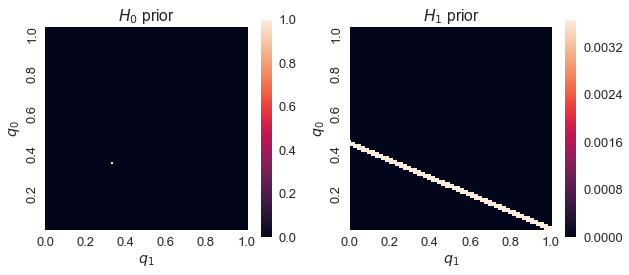

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.sca(axes[0])
heatmap(h0_prior(0.33))
plt.title('$H_0$ prior')
plt.sca(axes[1])
heatmap(h1_prior(0.3, 0.3))
plt.title('$H_1$ prior');

In [190]:
@memoize
def h0_prior(q):
    return np.diag(normalize(is_equal(grid, q)))

In [191]:
h1_prior(0.2, 0.9)[1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [192]:
def normalize(x):
    x = x.astype(float)
    x /= x.sum()
    return x

In [193]:
def h1_prior(p, q):
    Q = p * grid + ((1-p)* grid)[:, None]
    return normalize(is_equal(Q, q))

In [194]:
h1_prior(0.1, 0.9)

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00469484,  0.00469484,  0.00469484, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00469484,  0.00469484,  0.00469484, ...,  0.        ,
         0.        ,  0.        ]])

In [195]:
from itertools import permutations, repeat
grid_size = 101
grid_easier = np.linspace(0, 1, grid_size)
all_comb = [[x,y] for x in grid_easier for y in grid_easier]


In [196]:
def h1_prior_all(range_pq):
    to_ret = []
    for a in range_pq:
        p = a[0]
        q = a[1]
        Q = p * grid + ((1-p)* grid)[:, None]
        to_ret.append(normalize(is_equal(Q, q)))
    return to_ret

In [197]:
k = h1_prior_all(all_comb)

In [198]:
import matplotlib.pyplot as plt
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

In [199]:
def get_q1(p, q, q0):
    """Choose q1 such that the marginal q is maintained."""
    return(q - (1-p) * q0) / p

def get_q0(p, q, q1):
    """Choose q0 such that the marginal q is maintained."""
    return(q - p * q1) / (1-p)

p, q, q0 = .33, .33, .33
q1 = get_q1(p, q, q0)
print(p, q, q0, q1)
assert np.allclose([p * q1 + (1-p) * q0], [q])  # check that marginal holds
assert np.allclose([q0], [get_q0(p, q, q1)])  # check for consistency

0.33 0.33 0.33 0.33000000000000007


In [200]:
n = 1000
p = 0.33
q = 0.33
q1 = 0.33
q0 = 0.33
def sample_table(n, p, q0, q1):
    """Sample a contingency table with the given parameters."""
    n1 = binom(n, p).rvs()
    n0 = n - n1
    k0 = binom(n0, q0).rvs()
    k1 = binom(n1, q1).rvs()
    return np.array([[n0 - k0, k0], [n1-k1, k1]])

def expected_cell_rate(p, q0, q1):
    return np.array([
        
        [(1-p) * (1 - q0), (1-p) * q0],
        [p * (1 - q1), p * q1]
    ])

tbl = sample_table(100, p, q0, q1)
print('Counts')
print(tbl)
print('\nExpected Proportions')
print(expected_cell_rate(p, q0, q1))

Counts
[[32 23]
 [34 11]]

Expected Proportions
[[ 0.4489  0.2211]
 [ 0.2211  0.1089]]


In [201]:
X = sample_table(10000, 0.2, 0.4, 0.25) / 10000

In [206]:
grid_size = 101
grid = np.linspace(0, 1, grid_size)
grid

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,
        0.63,  0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,
        0.72,  0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,
        0.81,  0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,
        0.9 ,  0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,
        0.99,  1.  ])

(101, 101)

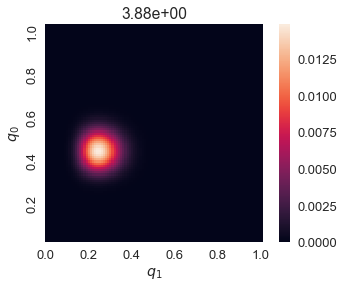

In [207]:
def likelihood_grid(tbl):
    """Binomial likelihood of the counts in tbl for a 2D grid of q0 and q1 values."""
    n0, n1 = tbl.sum(axis=1)  # counts for x
    k0, k1 = tbl[:, 1]  # counts for x given y=1
    pk0 = binom(n0, grid).pmf(k0)
    pk1 = binom(n1, grid).pmf(k1)
    return np.outer(pk0, pk1)

heatmap(likelihood_grid(tbl))
np.shape(likelihood_grid(tbl))


In [208]:
tbl

array([[32, 23],
       [34, 11]])

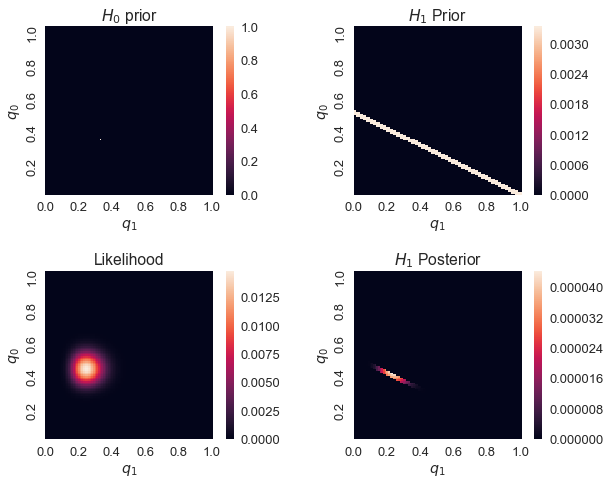

In [209]:
n = 1000
p = 0.33
q = 0.33
q1 = 0.33
q0 = 0.33
def log_likelihood_ratio(p, q, tbl):
    L = likelihood_grid(tbl)
    h0 = (h0_prior(q) * L).sum()
    h1 = (h1_prior(p, q) * L).sum()
    return np.log(h1) - np.log(h0)

fig, axes = plt.subplots(2, 2, figsize=(9, 7))

plt.sca(axes[0,0])
heatmap(h0_prior(0.33))
plt.title('$H_0$ prior')

plt.sca(axes[0,1])
heatmap(h1_prior(p, q))
plt.title('$H_1$ Prior')

plt.sca(axes[1,0])
heatmap(likelihood_grid(tbl))
plt.title('Likelihood');

plt.sca(axes[1,1])
heatmap(likelihood_grid(tbl) * h1_prior(p, q))
plt.title('$H_1$ Posterior');



plt.tight_layout()



In [210]:
p = 0.3
q = 0.3
log_likelihood_ratio(p, q, tbl)

-0.86156176255320727

In [211]:
def get_q1(p, q, q0):
    """Choose q1 such that the marginal q is maintained."""
    return(q - (1-p) * q0) / p
def get_q0(p, q, q1):
    """Choose q0 such that the marginal q is maintained."""
    return(q - p * q1) / (1-p)

In [212]:
def get_q0_q1(p, q, φ):
    q0 = get_q0(p, q, φ)
    q1 = get_q1(p, q, q0)
    if not (0 <= q0 <= 1) and (0 <= q1 <= 1):
        return np.nan, np.nan
    return q0, q1

In [213]:
p = 0.3
q = 0.4
q0, q1 = get_q0_q1(p, q, .3)

#matthews_corrcoef(x, y)

In [214]:
q0

0.44285714285714295

In [215]:
q1

0.29999999999999993

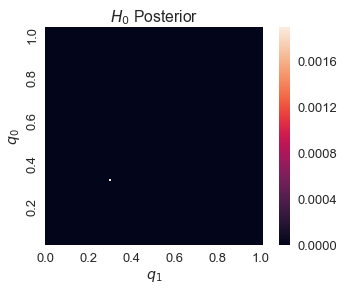

In [216]:
heatmap(likelihood_grid(tbl) * h0_prior(0.3))
plt.title('$H_0$ Posterior')

In [217]:
sum(likelihood_grid(tbl) * h0_prior(0.33).sum())

3.8819875776400443

In [218]:
k = likelihood_grid(tbl)
lalala = [l/k.sum() for l in k]

In [219]:
import numpy as np
import scipy.stats as stats
import pylab as pl

/Users/SophieS/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1649: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/Users/SophieS/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/Users/SophieS/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


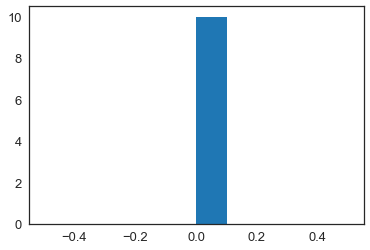

In [220]:
fit = stats.norm.pdf(lalala[0], np.mean(lalala[0]), np.std(lalala[0]))  #this is a fitting indeed
pl.hist(lalala[0],normed=True)      #use this to draw histogram of your data
pl.show() 

In [56]:
log_likelihood_ratio(0.33, 0.33, tbl)

0.16485392007403296

In [57]:
a = (1, 2, 3, 4, 5, 6, 7)

In [62]:
np.log(10)-np.log(100)

-2.3025850929940459

In [221]:
def forget(tbl, mem_rate, bias=None, ecr=None):
    """Stochastically drop (1-mem_rate) proportion of entries in tbl.
    
    If `bias` (a 2x2 array) is given, we make memory rate for each cell 
    proportion to the corresponding element of `bias`. Expected proportions
    of each cell must be provided"""
    if bias is None:
        cell_rates = np.ones(4) * mem_rate
    else:
        beta = mem_rate / np.dot(bias, ecr.flat) 
        cell_rates = beta * bias
    return binom(tbl, cell_rates.reshape((2,2))).rvs()

print(forget(tbl, 0.5))
print(forget(tbl, 0.5, np.array([1,1,1,2]), expected_cell_rate(p, q0, q1)))

[[14 15]
 [19  3]]
[[13 14]
 [17 10]]


In [222]:
def simulate(n, p, q, phi):
    """Evaluate biases of varying stregnth for all 4 cells in a sampled contingency table."""
    q0, q1 = get_q0_q1(p, q, phi)
    if np.isnan(q0):
#         No possible q0/q1 for this combination of p, q, and phi
        return
    ecr = expected_cell_rate(p, q0, q1)
    tbl = sample_table(n, p, q0, q1)
    true_llr = log_likelihood_ratio(p, q, tbl)
    for cell in range(4):
        bias = np.ones(4)
        for cell_bias in np.logspace(0, 3, num=14, base=2):
            bias[cell] = cell_bias
            for mem_rate in np.linspace(0.2, 1, 5):
                try:
                    noisy_tbl = forget(tbl, mem_rate, bias, ecr)
                except ValueError:
                    pass
                else:
                    yield {
                         'n': n, 'p': p, 'q': q, 'phi': phi,
                         'mem_rate': mem_rate, 'q0': q0, 'q1': q1,
                         'cell': cell, 'bias': cell_bias,
                         'llr':  log_likelihood_ratio(p, q, noisy_tbl),
                         'true_llr': true_llr,
                         'empirical_rate': noisy_tbl.sum() / n,
                    }

from toolz import concat
def simulate_many(n, p, q, phi, many=100):
    fn = 'data/' + '_'.join(map(str, [n,p,q,phi]))
    try:
        results = list(concat(simulate(n,p,q,phi) for _ in range(many)))
        df = pd.DataFrame(results)
        df.q0 = df.q0.round(4)
        df.q1 = df.q1.round(4)
        df.to_pickle(fn)
        df.set_index(['n', 'p','q','phi', 'q0', 'q1']).to_pickle(fn)
    except:
        pass

In [223]:
from toolz import concat
def dict_product(d):
    """All possible combinations of values in lists in `d`"""
    for k, v in d.items():
        if not isinstance(v, (list, np.ndarray)):
            d[k] = [v]
    for v in list(it.product(*d.values())):
        yield dict(zip(d.keys(), v))

params = dict_product({
    'n': [30, 60],
    'p': np.linspace(0.1, 0.4, 4),
    'q': np.linspace(0.1, 0.4, 4),
    'phi': np.linspace(0, 0.5, 6),
#     'mem_rate': [0.1, 0.2, 0.3],
})
def run_simulations():
    """This takes a while!"""
    from tqdm import tqdm
    from joblib import Parallel, delayed
    jobs = [delayed(simulate_many)(**prm) for prm in params]
    Parallel(22)(tqdm(jobs))

In [224]:
def read_simulations():
    data = []
    for fn in os.listdir('data'):
        data.append(pd.read_pickle(f'data/{fn}'))
    df = pd.concat(data)
    return df.reset_index()
data = read_simulations()

In [225]:
np.linspace(0.1, 0.4, 4)

array([ 0.1,  0.2,  0.3,  0.4])

In [226]:
np.linspace(0, 0.5, 6)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5])

In [227]:
data

,n,p,q,phi,q0,q1,bias,cell,empirical_rate,llr,mem_rate,true_llr
0,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.266667,0.726994,0.2,0.485532
1,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.433333,0.710913,0.4,0.485532
2,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.566667,0.680162,0.6,0.485532
3,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.833333,0.516534,0.8,0.485532
4,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,1.000000,0.485532,1.0,0.485532
5,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.166667,0.784176,0.2,0.485532
6,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.433333,0.627641,0.4,0.485532
7,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.633333,0.590130,0.6,0.485532
8,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.700000,0.609930,0.8,0.485532
9,30,0.1,0.2,0.5,0.1667,0.5,1.377009,0,0.233333,0.627169,0.2,0.485532


In [228]:
np.logspace(0, 3, num=14, base=2)

array([ 1.        ,  1.17346046,  1.37700945,  1.61586614,  1.89615503,
        2.22506295,  2.6110234 ,  3.06393271,  3.59540389,  4.21906431,
        4.95090514,  5.80969142,  6.81744317,  8.        ])

In [229]:
np.log(0.3) - np.log(0.03)

2.3025850929940459

In [230]:
data['correlated'] = abs(data.q0 - data.q1) > .01
data['guess'] = data.llr > 0
data['correct'] = data.guess == data.correlated
# data['result'] = data.correlated.astype(int).astype(str) + data.guess.astype(int).astype(str)
# data['false_positive'] = data.result == '11'
# data['logbias'] = np.log(data.bias)
# data['logbias_'] = data.logbias.round(2)
data['Cell'] = data.cell.replace({0: '00', 1: '01', 2: '10', 3: '11'})
# data['Bias'] = data.logbias.round(2)
data.q0 = data.q0.round(4)
data.q1 = data.q1.round(4)
# data['Memory'] = data.mem_rate.replace({x: f'{round(x*100)}%' for x in (0.1,0.2,0.3)})
# corr_labels = [
#     'No Correlation\n(0.3 vs 0.3)',
#     'Weak Correlation\n(0.2 vs 0.5)',
#     'Strong Correlation\n(0.1 vs 0.8)',
# ]
# data['correlation'] = pd.Categorical(data.q0.replace(dict(zip([.3, .2, .1], corr_labels))),
#                                      corr_labels, ordered=True)

In [231]:
p = 0.3
q = 0.3
tbl = sample_table(18, p, q0, q1)

In [232]:
print(forget(tbl, 0.7, bias=None, ecr=None))

[[3 7]
 [3 1]]


In [238]:
data

,n,p,q,phi,q0,q1,bias,cell,empirical_rate,llr,mem_rate,true_llr,correlated,guess,correct,Cell,error
0,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.266667,0.726994,0.2,0.485532,True,True,True,00,0.241463
1,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.433333,0.710913,0.4,0.485532,True,True,True,00,0.225381
2,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.566667,0.680162,0.6,0.485532,True,True,True,00,0.194631
3,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.833333,0.516534,0.8,0.485532,True,True,True,00,0.031002
4,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,1.000000,0.485532,1.0,0.485532,True,True,True,00,0.000000
5,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.166667,0.784176,0.2,0.485532,True,True,True,00,0.298645
6,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.433333,0.627641,0.4,0.485532,True,True,True,00,0.142109
7,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.633333,0.590130,0.6,0.485532,True,True,True,00,0.104598
8,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.700000,0.609930,0.8,0.485532,True,True,True,00,0.124398
9,30,0.1,0.2,0.5,0.1667,0.5,1.377009,0,0.233333,0.627169,0.2,0.485532,True,True,True,00,0.141637


In [234]:
data['error'] = abs(data.llr - data.true_llr)

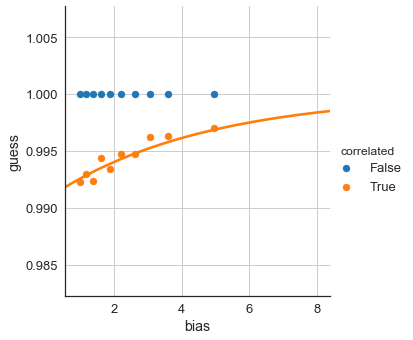

In [235]:
df = data.query('Cell == "11"')
sns.lmplot('bias', 'guess', data=df, hue='correlated', x_bins=14, logistic=True, ci=None)
plt.grid()

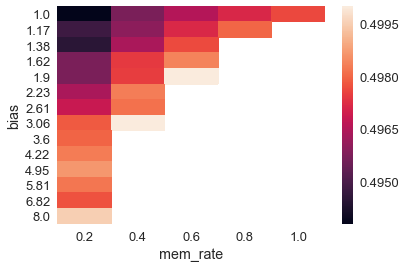

In [236]:
df = data.query('Cell == "11"')
g = df.groupby(['bias', 'mem_rate', 'correlated'])
mask = df.groupby(['bias', 'mem_rate']).correlated.mean() != 1
correct = g.correct.mean().mean(level=[0,1]).loc[mask].unstack()
sns.heatmap(correct, #vmin=0.5, vmax=1, 
            xticklabels=correct.columns.values.round(2),
            yticklabels=correct.index.values.round(2))

In [82]:
from toolz import curry
from tqdm import tqdm

@curry
def progress(func, n_calls=None, best=None):
    _best = None
    pbar = tqdm(total=n_calls)
    def wrapped(*args, **kwargs):
        nonlocal best
        x = func(*args, **kwargs)
        pbar.update()
        if best:
            _best = best(x, _best)
            pbar.set_postfix(best=best, last=x)
        return x
    return wrapped

import time
@progress(n_calls=10)
def wait():
    time.sleep(.2)
    return 1
    
for _ in range(10):
    wait()

100%|██████████| 10/10 [00:02<00:00,  4.86it/s]

AttributeError: 'AxesSubplot' object has no attribute 'factorplot'

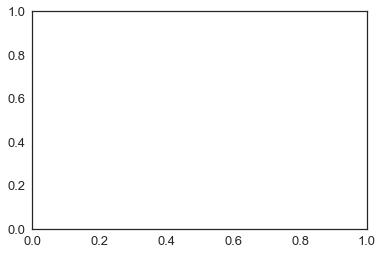

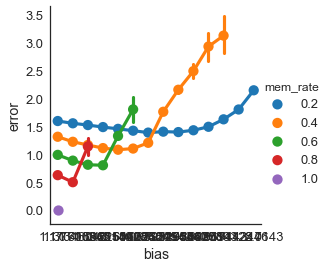

In [84]:
sns.factorplot('bias', 'error', hue='mem_rate', data=df)

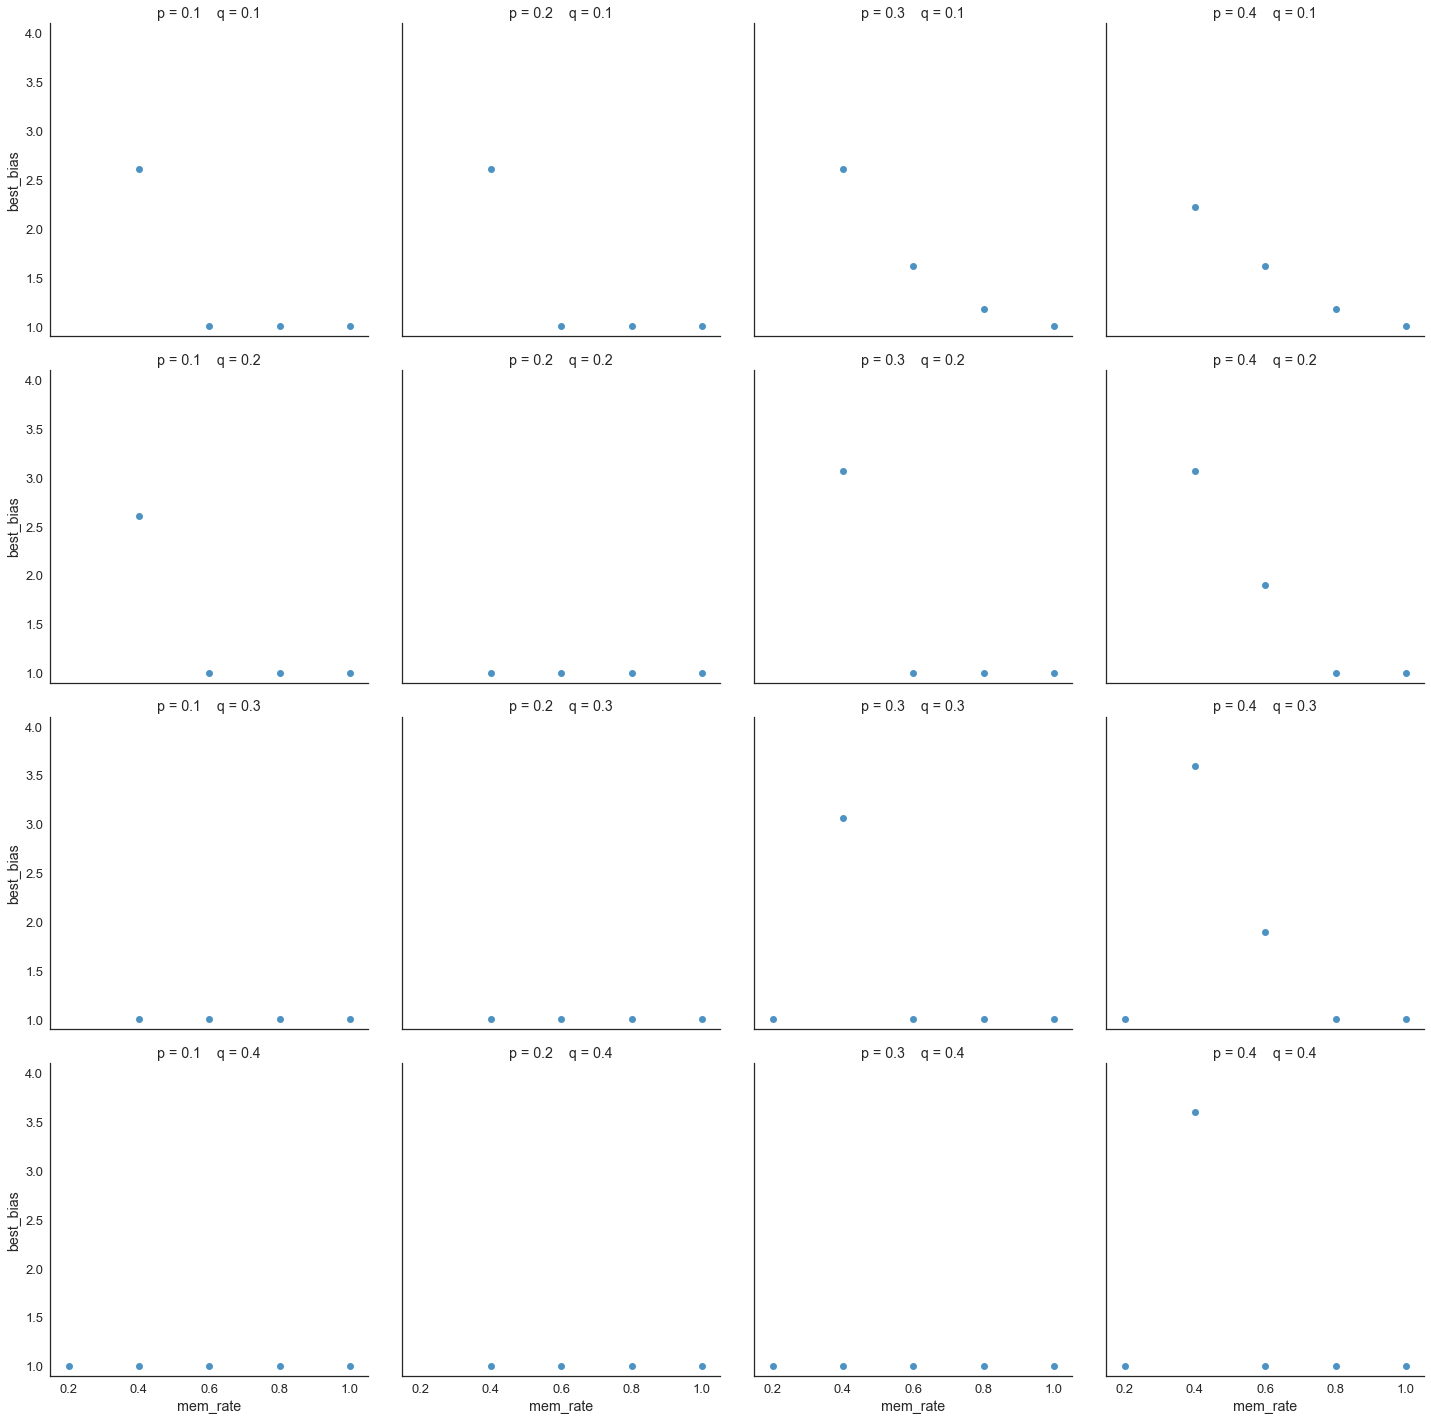

In [237]:
df = data.query('Cell == "11"')

def bias_value(df, group_vars):
    g = df.groupby([*group_vars, 'bias', 'correlated'])
    correct = g.correct.mean().mean(level=list(range(len(group_vars)+1)))
    return correct

def best_bias(df, group_vars):
    return (bias_value(df, group_vars).unstack().idxmax(axis=1)
            .reset_index().rename(columns={0: 'best_bias'}))

g = sns.lmplot('mem_rate', 'best_bias', col='p', row='q',  
               data=best_bias(df, ['p', 'q', 'mem_rate']),
               fit_reg=False)

for ax in g.axes.flat:
    plt.sca(ax)
    plt.ylim(0.9, 4.1)
g.set_titles('p = {col_name:.1f}    q = {row_name:.1f}')

In [109]:
group_vars=['p', 'q', 'mem_rate']
g = df.groupby([*['p', 'q', 'mem_rate'], 'bias', 'correlated'])
correct = g.correct

In [127]:
#g.head()

In [128]:
#g.correct.mean()

In [129]:
#g.correct.mean().mean(level=list(range(len(group_vars)+1)))

In [94]:
data=best_bias(df, ['p', 'q', 'mem_rate'])

In [96]:
def best_bias(df, group_vars):
    return (bias_value(df, group_vars).unstack().idxmax(axis=1)
            .reset_index().rename(columns={0: 'best_bias'}))

In [249]:
def simulate(n, p, q, phi):
    """Evaluate biases of varying stregnth for all 4 cells in a sampled contingency table."""
    q0, q1 = get_q0_q1(p, q, phi)
    if np.isnan(q0):
#         No possible q0/q1 for this combination of p, q, and phi
        return
    ecr = expected_cell_rate(p, q0, q1)
    tbl = sample_table(n, p, q0, q1)
    true_llr = log_likelihood_ratio(p, q, tbl)
    for cell in range(4):
        bias = np.ones(4)
        for cell_bias in np.logspace(0, 3, num=14, base=2):
            bias[cell] = cell_bias
            for mem_rate in np.linspace(0.2, 1, 5):
                try:
                    noisy_tbl = forget(tbl, mem_rate, bias, ecr)
                except ValueError:
                    pass
                else:
                    yield {
                         'n': n, 'p': p, 'q': q, 'phi': phi,
                         'mem_rate': mem_rate, 'q0': q0, 'q1': q1,
                         'cell': cell, 'bias': cell_bias,
                         'llr':  log_likelihood_ratio(p, q, noisy_tbl),
                         'true_llr': true_llr,
                         'empirical_rate': noisy_tbl.sum() / n,
                    }

from toolz import concat
def simulate_many(n, p, q, phi, many=100):
    fn = 'data/' + '_'.join(map(str, [n,p,q,phi]))
    try:
        results = list(concat(simulate(n,p,q,phi) for _ in range(many)))
        df = pd.DataFrame(results)
        df.q0 = df.q0.round(4)
        df.q1 = df.q1.round(4)
        df.to_pickle(fn)
        df.set_index(['n', 'p','q','phi', 'q0', 'q1']).to_pickle(fn)
    except:
        pass

In [273]:
from toolz import concat
def dict_product(d):
    """All possible combinations of values in lists in `d`"""
    for k, v in d.items():
        if not isinstance(v, (list, np.ndarray)):
            d[k] = [v]
    for v in list(it.product(*d.values())):
        yield dict(zip(d.keys(), v))

params = dict_product({
    'n': [30, 60],
    'p': np.linspace(0.1, 0.4, 4),
    'q': np.linspace(0.1, 0.4, 4),
    'phi': np.linspace(0, 0.5, 6),
#     'mem_rate': [0.1, 0.2, 0.3],
})
def run_simulations():
    """This takes a while!"""
    from tqdm import tqdm
    from joblib import Parallel, delayed
    jobs = [delayed(simulate_many)(**prm) for prm in params]
    Parallel(22)(tqdm(jobs))

In [274]:
def read_simulations():
    data = []
    for fn in os.listdir('data'):
        data.append(pd.read_pickle(f'data/{fn}'))
    df = pd.concat(data)
    return df.reset_index()
data = read_simulations()

In [275]:
simulate([30, 60], np.linspace(0.1, 0.4, 4), np.linspace(0.1, 0.4, 4), np.linspace(0, 0.5, 6))

<generator object simulate at 0x195ac7fc0>

In [276]:
dict_product(params)

<generator object dict_product at 0x195a57678>

In [278]:
run_simulations()


100%|██████████| 192/192 [08:09<00:00,  2.55s/it]


In [279]:
def read_simulations():
    data = []
    for fn in os.listdir('data'):
        data.append(pd.read_pickle(f'data/{fn}'))
    df = pd.concat(data)
    return df.reset_index()
data = read_simulations()

In [144]:
data.head(10)

,n,p,q,phi,q0,q1,bias,cell,empirical_rate,llr,mem_rate,true_llr
0,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.266667,0.726994,0.2,0.485532
1,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.433333,0.710913,0.4,0.485532
2,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.566667,0.680162,0.6,0.485532
3,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,0.833333,0.516534,0.8,0.485532
4,30,0.1,0.2,0.5,0.1667,0.5,1.000000,0,1.000000,0.485532,1.0,0.485532
5,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.166667,0.784176,0.2,0.485532
6,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.433333,0.627641,0.4,0.485532
7,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.633333,0.590130,0.6,0.485532
8,30,0.1,0.2,0.5,0.1667,0.5,1.173460,0,0.700000,0.609930,0.8,0.485532
9,30,0.1,0.2,0.5,0.1667,0.5,1.377009,0,0.233333,0.627169,0.2,0.485532


In [174]:
data_ill = data.query('phi == "0.0"')

In [177]:
df = data.query('Cell == "11"')
g = df.groupby(['bias', 'mem_rate', 'correlated'])
mask = df.groupby(['bias', 'mem_rate']).correlated.mean() != 1
correct = g.correct.mean().mean(level=[0,1]).loc[mask].unstack()
sns.heatmap(correct, #vmin=0.5, vmax=1, 
            xticklabels=correct.columns.values.round(2),
            yticklabels=correct.index.values.round(2))

UndefinedVariableError: name 'Cell' is not defined

In [268]:
data_mm['correlated'] = abs(data_mm.q0 - data_mm.q1) > .01
data_mm['guess'] = data_mm.llr > 0
data_mm['correct'] = data_mm.guess == data_mm.correlated
# data['result'] = data.correlated.astype(int).astype(str) + data.guess.astype(int).astype(str)
# data['false_positive'] = data.result == '11'
# data['logbias'] = np.log(data.bias)
# data['logbias_'] = data.logbias.round(2)
data_mm['Cell'] = data_mm.cell.replace({0: '00', 1: '01', 2: '10', 3: '11'})
# data['Bias'] = data.logbias.round(2)
data_mm.q0 = data_mm.q0.round(4)
data_mm.q1 = data_mm.q1.round(4)
# data['Memory'] = data.mem_rate.replace({x: f'{round(x*100)}%' for x in (0.1,0.2,0.3)})
# corr_labels = [
#     'No Correlation\n(0.3 vs 0.3)',
#     'Weak Correlation\n(0.2 vs 0.5)',
#     'Strong Correlation\n(0.1 vs 0.8)',
# ]
# data['correlation'] = pd.Categorical(data.q0.replace(dict(zip([.3, .2, .1], corr_labels))),
data_mm['error'] = abs(data_mm.llr - data_mm.true_llr)
#         

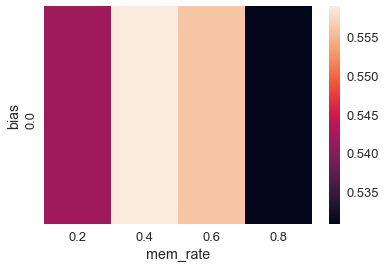

In [290]:
df_mm = data_mm.query('Cell == "11"')
g = df_mm.groupby(['bias', 'mem_rate', 'correlated'])
mask = df_mm.groupby(['bias', 'mem_rate']).correlated.mean() != 1
correct = g.correct.mean().mean(level=[0,1]).loc[mask].unstack()
sns.heatmap(correct, #vmin=0.5, vmax=1, 
            xticklabels=correct.columns.values.round(2),
            yticklabels=correct.index.values.round(2))

In [292]:
df_mq = df_mm.query("p == '0.3'")
df_mm

,n,p,q,phi,q0,q1,bias,cell,empirical_rate,llr,mem_rate,true_llr,correlated,guess,correct,Cell,error
126,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.466667,0.078576,0.2,-0.213519,True,True,True,11,0.292095
127,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.366667,-0.243922,0.4,-0.213519,True,False,False,11,0.030402
128,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.666667,-0.326033,0.6,-0.213519,True,False,False,11,0.112514
129,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.900000,-0.115709,0.8,-0.213519,True,False,False,11,0.097811
130,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.166667,0.218164,0.2,-0.213519,True,True,True,11,0.431683
131,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.366667,-0.042112,0.4,-0.213519,True,False,False,11,0.171408
132,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.800000,0.258005,0.6,-0.213519,True,True,True,11,0.471524
133,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.733333,-0.080319,0.8,-0.213519,True,False,False,11,0.133200
134,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.433333,-0.182749,0.2,-0.213519,True,False,False,11,0.030771
135,30,0.1,0.2,0.5,0.1667,0.5,0.0,3,0.300000,-0.299363,0.4,-0.213519,True,False,False,11,0.085844


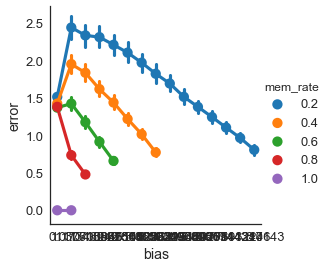

In [271]:

sns.factorplot('bias', 'error', hue='mem_rate', data=df_mm)

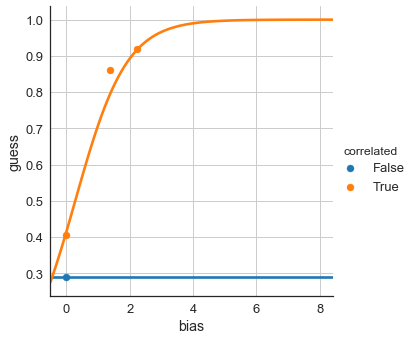

In [283]:
data['error'] = abs(data.llr - data.true_llr)
data['correlated'] = abs(data.q0 - data.q1) > .01
data['guess'] = data.llr > 0
data['correct'] = data.guess == data.correlated
# data['result'] = data.correlated.astype(int).astype(str) + data.guess.astype(int).astype(str)
# data['false_positive'] = data.result == '11'
# data['logbias'] = np.log(data.bias)
# data['logbias_'] = data.logbias.round(2)
data['Cell'] = data.cell.replace({0: '00', 1: '01', 2: '10', 3: '11'})
# data['Bias'] = data.logbias.round(2)
data.q0 = data.q0.round(4)
data.q1 = data.q1.round(4)
# data['Memory'] = data.mem_rate.replace({x: f'{round(x*100)}%' for x in (0.1,0.2,0.3)})
# corr_labels = [
#     'No Correlation\n(0.3 vs 0.3)',
#     'Weak Correlation\n(0.2 vs 0.5)',
#     'Strong Correlation\n(0.1 vs 0.8)',
# ]
# data['correlation'] = pd.Categorical(data.q0.replace(dict(zip([.3, .2, .1], corr_labels))),
#                                      corr_labels, ordered=True)
df = data.query('Cell == "11"')
sns.lmplot('bias', 'guess', data=df, hue='correlated', x_bins=14, logistic=True, ci=None)
plt.grid()